<a href="https://colab.research.google.com/github/hfelizzola/Curso-Estadistica/blob/main/Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Regresión Lineal

In [21]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Para modelo de regresión
import statsmodels.api as sm
pd.set_option('display.max_columns',None)

In [2]:
# Para conectarse con google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
# Configurar directorio de trabajo
os.chdir('/gdrive/MyDrive/Colab Notebooks/Estadistica')

In [19]:
# Verificar lista de archivos en directorio de trabajo
!ls

credit_data.xlsx		 Intervalos-Confianza.ipynb  Regresion-Lineal
datos_regresion.xlsx		 movies.xlsx
Estadisticas_Descriptivas.ipynb  Prueba-Hipotesis.ipynb


## Regresión Lineal Simple

In [43]:
# Cargar datos
df1 = pd.read_excel('datos_regresion.xlsx', sheet_name='gasto publicidad 1')
df1.head()

,region,gasto-publicidad,ventas
0,1,77,80
1,2,50,55
2,3,71,60
3,4,72,74
4,5,81,78


In [44]:
# Estadísticas descriptivas
df1[['gasto-publicidad','ventas']].describe()

,gasto-publicidad,ventas
count,9.000000,9.000000
mean,78.555556,80.666667
std,15.883255,17.233688
min,50.000000,55.000000
25%,71.000000,74.000000
50%,77.000000,79.000000
75%,94.000000,92.000000
max,99.000000,107.000000


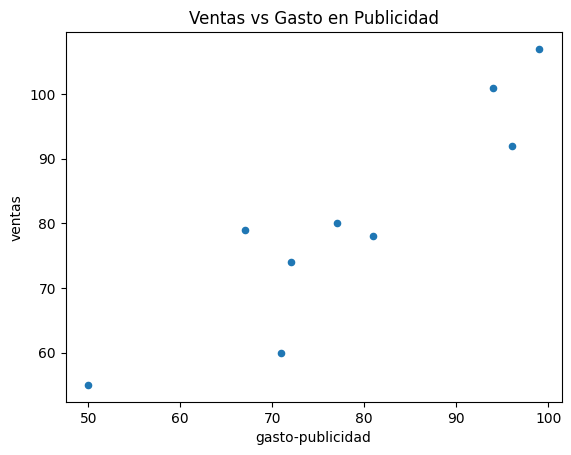

In [45]:
# Análisis de correlación entre el gasto en publicidad y las ventas
df1.plot.scatter(x='gasto-publicidad', y='ventas')
plt.title('Ventas vs Gasto en Publicidad')
plt.show()

In [46]:
df1[['gasto-publicidad','ventas']].corr()

,gasto-publicidad,ventas
gasto-publicidad,1.000000,0.911796
ventas,0.911796,1.000000


In [47]:
# Modelo de Regresión Lineal
# Define la variable dependiente
y = df1['ventas']

# Define la variable independiente
x = df1['gasto-publicidad']

# Agrega la constante
x = sm.add_constant(x)

# Ajusta el modelo de regresión
model = sm.OLS(y, x)
results = model.fit()

# Imprime un resumen del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     34.51
Date:                Fri, 19 May 2023   Prob (F-statistic):           0.000615
Time:                        03:46:51   Log-Likelihood:                -29.852
No. Observations:                   9   AIC:                             63.70
Df Residuals:                       7   BIC:                             64.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.9501     13.467  

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Ejercicio en clase

Una compañía local de energía seleccionó una residencia típica para desarrollar un modelo empírico para el consumo de energía (en kilowatts por día) como una función de la temperatura promedio diaria durante los meses de invierno. Se obtuvo la siguiente información durante un periodo de 15 días.

In [ ]:
# Cargar datos



#### Presente estadísticas descriptivas y análisis de correlación

In [ ]:
# Estadísticas descriptivas




In [ ]:
# Análisis de correlación




#### Presente la ecuación de regresión lineal que permita modelar el consumo de energía en función de la temperatura promedio del día.

In [ ]:
# Modelo de Regresión




#### Haga un análisis de significancia de la regresión. Presente el F0 y el valor p. ¿Qué conclusiones puede generar?


#### Haga una análisis de significancia de los coeficientes de la regresión. ¿Qué términos del modelo son significativos? Presente el valor p para cada coeficiente.




#### Haga un análisis de la capacidad explicativa del modelo utilizando el coeficiente de determinación y $𝑅_{𝐴𝑗𝑢𝑠𝑡𝑎𝑑𝑜}^2$. ¿Qué proporción del consumo de energía es explicado por el modelo de regresión?

## Modelo de Regresión Múltiple

In [32]:
# Cargar datos
df2 = pd.read_excel('datos_regresion.xlsx', sheet_name='gasto publicidad 2')
df2.head()

,tv,radio,periodico,zona,ventas
0,230.1,37.8,69.2,sur,22.1
1,44.5,39.3,45.1,norte,10.4
2,17.2,45.9,69.3,norte,9.3
3,151.5,41.3,58.5,sur,18.5
4,180.8,10.8,58.4,centro,12.9


In [33]:
# Estadísticas descriptivas
df2.describe()

,tv,radio,periodico,ventas
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Figure size 500x500 with 0 Axes>

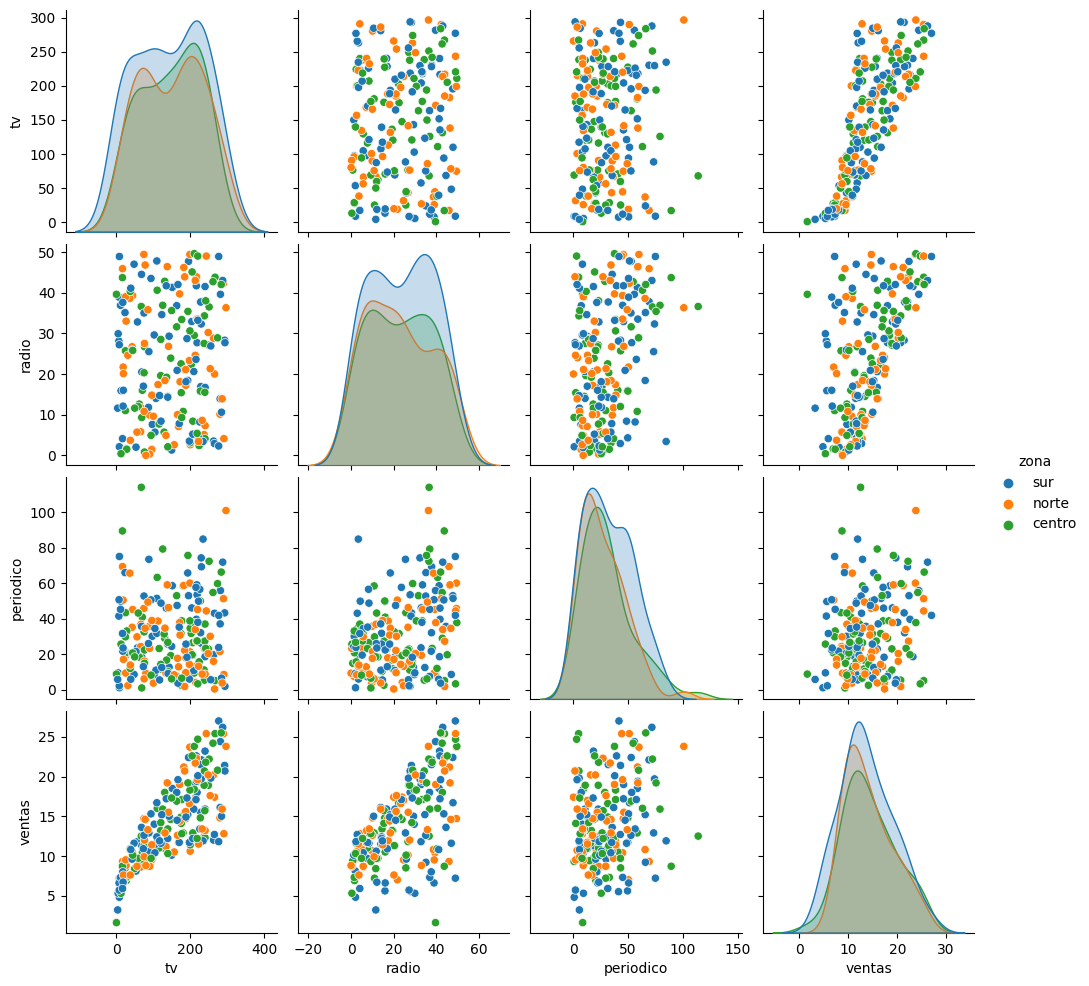

In [40]:
# Análisis de correlación
plt.figure(figsize=(5,5))
sns.pairplot(df2, hue="zona")
plt.show()

In [41]:
df2.corr()

<ipython-input-41-e0c6714eb3b3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,tv,radio,periodico,ventas
tv,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
periodico,0.056648,0.354104,1.000000,0.228299
ventas,0.782224,0.576223,0.228299,1.000000


<Axes: xlabel='zona', ylabel='ventas'>

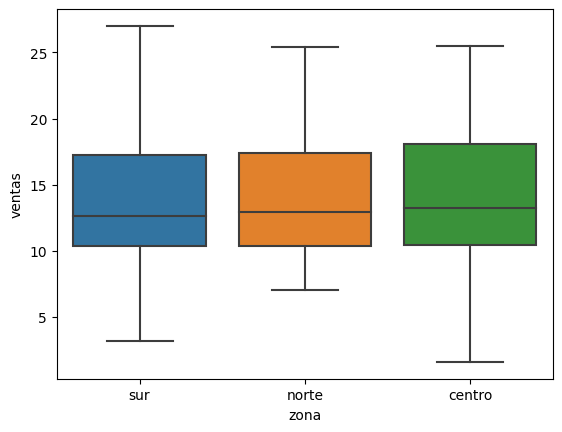

In [49]:
# Ventas entre zonas
sns.boxplot(data=df2, x='zona', y='ventas')

In [48]:
# Modelo de Regresión
y = df2['ventas']

# Variables independientes
x = df2[['tv','radio','periodico','zona']]
x = pd.get_dummies(x, drop_first=True)
x

,tv,radio,periodico,zona_norte,zona_sur
0,230.1,37.8,69.2,0,1
1,44.5,39.3,45.1,1,0
2,17.2,45.9,69.3,1,0
3,151.5,41.3,58.5,0,1
4,180.8,10.8,58.4,0,0
...,...,...,...,...,...
195,38.2,3.7,13.8,1,0
196,94.2,4.9,8.1,0,0
197,177.0,9.3,6.4,0,0
198,283.6,42.0,66.2,0,0


In [50]:
# Agrega la constante
x = sm.add_constant(x)

# Ajusta el modelo de regresión
model = sm.OLS(y, x)
results = model.fit()

# Imprime un resumen del modelo
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 ventas   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     347.7
Date:                Fri, 19 May 2023   Prob (F-statistic):           9.02e-95
Time:                        03:58:09   Log-Likelihood:                -383.81
No. Observations:                 200   AIC:                             779.6
Df Residuals:                     194   BIC:                             799.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2626      0.359      9.085      0.0

In [62]:
# Comparar ventas estimadas vs ventas reales
ventas_estimadas = results.fittedvalues
ventas_reales = y
pd.DataFrame({'Ventas Reales':ventas_reales, 'Ventas Estiimadas': ventas_estimadas})

,Ventas Reales,Ventas Estiimadas
0,22.1,20.255547
1,10.4,12.392356
2,9.3,12.375137
3,18.5,17.331047
4,12.9,13.527409
...,...,...
195,7.6,5.402242
196,9.7,8.488050
197,12.8,13.104420
198,25.5,24.112516


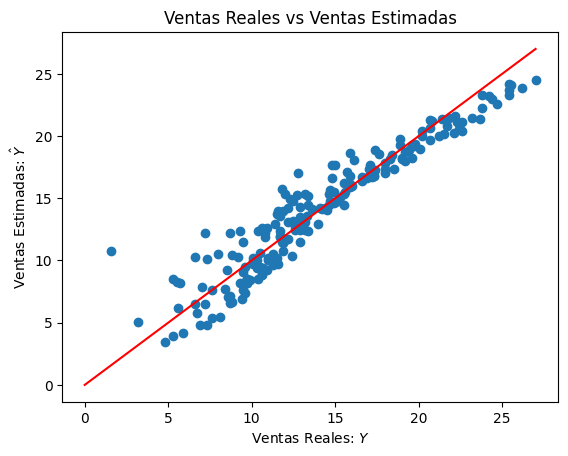

In [61]:
# Gráfica de ventas reales vs ventas estimadas
plt.scatter(x=ventas_reales, y=ventas_estimadas)
plt.plot([0,np.max(ventas_reales)], [0,np.max(ventas_reales)], color="red")
plt.title("Ventas Reales vs Ventas Estimadas")
plt.xlabel(f"Ventas Reales: $Y$")
plt.ylabel(f"Ventas Estimadas: $\hat Y$")
plt.show()

In [75]:
# Mean Square Error
mse = np.mean((ventas_reales - ventas_estimadas)**2)
mse

2.718792777368817

In [76]:
# Root Mean Square Error
rmse = np.sqrt(mse)
rmse

1.648876216508934

In [80]:
# Coeficiente de variación
cv = rmse/np.abs(np.mean(ventas_reales))*100
cv

11.758789206695909

## Ejercicio en clase - Regresión múltiple

Los datos de una encuesta de satisfacción de clientes de una aerolinea son suministrados en el archivo de excel. Para los clientes entrevistados se registro el sexo, la edad, el estatus del cliente (básico, oro, platino), el número de viajes realizados con la aerolinea en los últimos doce meses (los valores más altos indican mayor gravedad), y el pago promedio de los tiquetes comprados en los últimos doce meses. La satisfacción se mide en una escala de 0-100, los valores altos indican una mayor satisfacción. Los datos estan almacenados en el archivo de Excel en la hoja survey_aerolinea. Desarrolle un modelo de regresión múltiple que permita explicar la satisfacción del cliente y responda las siguientes preguntas:

1. ¿Es significativa la regresión? Justifique su respuesta.
2. ¿Cual es el $𝑅^2$ y qué significa esto para le modelo?
3. ¿Qué variables parecen estar correlacionadas?
4. ¿Cuales son las variables son significativas?
5. ¿Que variables aportan negativa y positivamente a la satisfacción del cliente?
6. Escriba la ecuación del modelo.

In [ ]:
# Estadísticas descriptivas




In [ ]:
# Gráfico de dispersión



In [ ]:
# Matriz de correlación




In [ ]:
# Modelo de regresión




In [ ]:
# Gráfico de comparación de valores reales vs estimados




In [ ]:
# Calculo del MSE y el CV




Respuesta a cada una de las preguntas: